# Logistic Regression with scikit-learn

This is an example of logistic regression in Python with the [scikit-learn module](http://scikit-learn.org/), performed for an [assignment](https://github.com/ajschumacher/gadsdc/tree/master/logistic_assignment) with my [General Assembly Data Science class](https://generalassemb.ly/education/data-science).

## Dataset

The dataset I chose is the [affairs dataset](http://statsmodels.sourceforge.net/stable/datasets/generated/fair.html) that comes with [Statsmodels](http://statsmodels.sourceforge.net/). It was derived from a survey of women in 1974 by Redbook magazine, in which married women were asked about their participation in extramarital affairs. More information about the study is available in a [1978 paper](http://fairmodel.econ.yale.edu/rayfair/pdf/1978a200.pdf) from the Journal of Political Economy.

## Description of Variables

The dataset contains 6366 observations of 9 variables:

* `rate_marriage`: woman's rating of her marriage (1 = very poor, 5 = very good)
* `age`: woman's age
* `yrs_married`: number of years married
* `children`: number of children
* `religious`: woman's rating of how religious she is (1 = not religious, 4 = strongly religious)
* `educ`: level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree)
* `occupation`: woman's occupation (1 = student, 2 = farming/semi-skilled/unskilled, 3 = "white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)
* `occupation_husb`: husband's occupation (same coding as above)
* `affairs`: time spent in extra-marital affairs



In [258]:
#the code below imports a few packages we will need for this analysis
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
from patsy import dmatrices


In [259]:
#Import Data from Statsmodel
df = sm.datasets.fair.load_pandas().data
pd.set_option('display.width', 1000)
print df.head()


   rate_marriage   age  yrs_married  children  religious  educ  occupation  occupation_husb   affairs
0            3.0  32.0          9.0       3.0        3.0  17.0         2.0              5.0  0.111111
1            3.0  27.0         13.0       3.0        1.0  14.0         3.0              4.0  3.230769
2            4.0  22.0          2.5       0.0        1.0  16.0         3.0              5.0  1.400000
3            4.0  37.0         16.5       4.0        3.0  16.0         5.0              5.0  0.727273
4            5.0  27.0          9.0       1.0        1.0  14.0         3.0              4.0  4.666666


In [260]:
print df.describe()

TypeError: isinstance() arg 2 must be a class, type, or tuple of classes and types

In [254]:
#Import Data from Statsmodel
df = sm.datasets.fair.load_pandas().data



   rate_marriage   age  yrs_married  children  religious  educ  occupation  occupation_husb  \
0            3.0  32.0          9.0       3.0        3.0  17.0         2.0              5.0   
1            3.0  27.0         13.0       3.0        1.0  14.0         3.0              4.0   
2            4.0  22.0          2.5       0.0        1.0  16.0         3.0              5.0   

    affairs  affair  
0  0.111111       1  
1  3.230769       1  
2  1.400000       1  


In [ ]:
# add "affair" column: 1 represents having affairs, 0 represents not
df ['affair'] = (df.affairs > 0).astype(int)

print df.head(3)

TypeError: isinstance() arg 2 must be a class, type, or tuple of classes and types

In [228]:
print df.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ', 'occupation', 'occupation_husb', 'affairs', 'affair'], dtype='object')


In [230]:
print pd.crosstab(df['affair'], df['rate_marriage'], rownames=['affair'])

rate_marriage  1.0  2.0  3.0   4.0   5.0
affair                                  
0               25  127  446  1518  2197
1               74  221  547   724   487


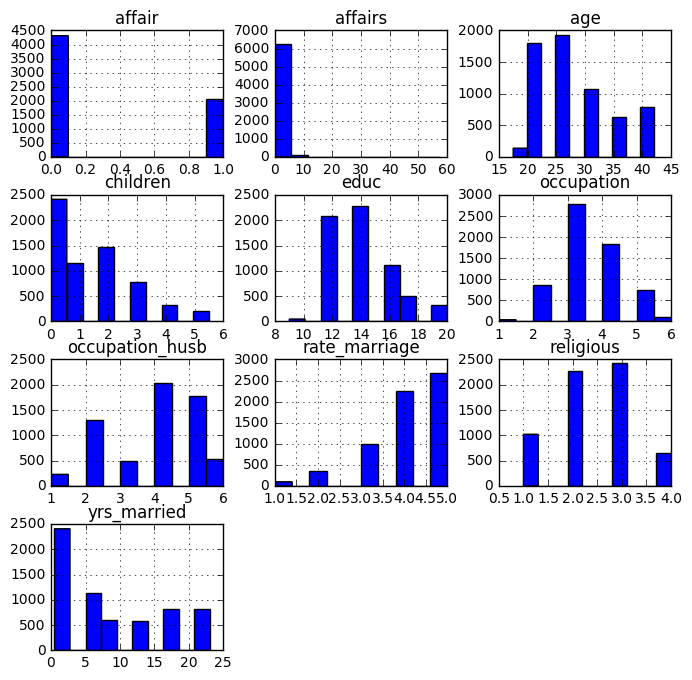

In [231]:
df.hist(figsize =[8,8])
pl.show()

In [22]:
df.groupby('affair').mean()
#Result show 

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [25]:
df.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


In [ ]:
affair_yrs_married = pd.crosstab(df.yrs_married, df.affair.astype(bool))
affair_yrs_married.div(affair_yrs_married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Affair Percentage by Years Married')
plt.xlabel('Years Married')
plt.ylabel('Percentage')

In [ ]:
affair_children = pd.crosstab(df.children, df.affair.astype(bool))
affair_children.div(affair_children.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Affair Percentage by Rate Marriage')
plt.xlabel('Children')
plt.ylabel('Percentage')

In [ ]:
affair_rate_marriage = pd.crosstab(df.rate_marriage, df.affair.astype(bool))
affair_rate_marriage.div(affair_rate_marriage.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Affair Percentage by Rate Marriage')
plt.xlabel('Rate Marriage')
plt.ylabel('Percentage')

In [232]:
# dummify rank
dummy_occu = pd.get_dummies(df['occupation'], prefix = 'occu')
print dummy_occu.head()


   occu_1.0  occu_2.0  occu_3.0  occu_4.0  occu_5.0  occu_6.0
0       0.0       1.0       0.0       0.0       0.0       0.0
1       0.0       0.0       1.0       0.0       0.0       0.0
2       0.0       0.0       1.0       0.0       0.0       0.0
3       0.0       0.0       0.0       0.0       1.0       0.0
4       0.0       0.0       1.0       0.0       0.0       0.0


In [234]:
# dummify rank
dummy_occuhusb = pd.get_dummies(df['occupation_husb'], prefix='occuh')
print dummy_occuhusb.head()

   occuh_1.0  occuh_2.0  occuh_3.0  occuh_4.0  occuh_5.0  occuh_6.0
0        0.0        0.0        0.0        0.0        1.0        0.0
1        0.0        0.0        0.0        1.0        0.0        0.0
2        0.0        0.0        0.0        0.0        1.0        0.0
3        0.0        0.0        0.0        0.0        1.0        0.0
4        0.0        0.0        0.0        1.0        0.0        0.0


In [236]:
# create a clean data frame for the regression
cols_0 = ['affair','rate_marriage','age','yrs_married','children','religious','educ']
data_0 = df[cols_0].join(dummy_occu.ix[:,'occu_2':])
data_0 = data_0.join(dummy_occuhusb.ix[:,'occuh_2':])
pd.set_option('display.width', 100)
print data_0.head()        

   affair  rate_marriage   age  yrs_married  children  religious  educ  occu_2.0  occu_3.0  \
0       1            3.0  32.0          9.0       3.0        3.0  17.0       1.0       0.0   
1       1            3.0  27.0         13.0       3.0        1.0  14.0       0.0       1.0   
2       1            4.0  22.0          2.5       0.0        1.0  16.0       0.0       1.0   
3       1            4.0  37.0         16.5       4.0        3.0  16.0       0.0       0.0   
4       1            5.0  27.0          9.0       1.0        1.0  14.0       0.0       1.0   

   occu_4.0  occu_5.0  occu_6.0  occuh_2.0  occuh_3.0  occuh_4.0  occuh_5.0  occuh_6.0  
0       0.0       0.0       0.0        0.0        0.0        0.0        1.0        0.0  
1       0.0       0.0       0.0        0.0        0.0        1.0        0.0        0.0  
2       0.0       0.0       0.0        0.0        0.0        0.0        1.0        0.0  
3       0.0       1.0       0.0        0.0        0.0        0.0        1.0    

In [237]:
# manually add the intercept
data_0['intercept'] = 1.0
print data_0.head() 

   affair  rate_marriage   age  yrs_married  children  religious  educ  occu_2.0  occu_3.0  \
0       1            3.0  32.0          9.0       3.0        3.0  17.0       1.0       0.0   
1       1            3.0  27.0         13.0       3.0        1.0  14.0       0.0       1.0   
2       1            4.0  22.0          2.5       0.0        1.0  16.0       0.0       1.0   
3       1            4.0  37.0         16.5       4.0        3.0  16.0       0.0       0.0   
4       1            5.0  27.0          9.0       1.0        1.0  14.0       0.0       1.0   

   occu_4.0  occu_5.0  occu_6.0  occuh_2.0  occuh_3.0  occuh_4.0  occuh_5.0  occuh_6.0  intercept  
0       0.0       0.0       0.0        0.0        0.0        0.0        1.0        0.0        1.0  
1       0.0       0.0       0.0        0.0        0.0        1.0        0.0        0.0        1.0  
2       0.0       0.0       0.0        0.0        0.0        0.0        1.0        0.0        1.0  
3       0.0       1.0       0.0    

In [238]:
train_cols_0 = data_0.columns[1:]
logit_0 = sm.Logit(data_0['affair'], data_0[train_cols_0])
# fit the model
result_0 = logit_0.fit()


Optimization terminated successfully.
         Current function value: 0.542911
         Iterations 6


In [239]:
print result_0.summary()
#from the result we can see 
#1. Rate of marriage, as expected, has a negative effect on probability of having an affair
#2. Result show that age has a negative effect while year of marriage has a positive effect, 
#   obviously there is a positive correlation between age and years of marriage, 
#   Therefore in the following regression I want to drop years of marriage
#3. Having an religious will have a negative effect on the probability, 
#4. Number of child and education effects are ambiguous
#5. Among the occupation and husbands' occupation, husbands' occupation 
#   individually does not show statistical significance, test join effect(F test) next.
#   However, occupation of wife have a positive influence on probability of having an affair. 

                           Logit Regression Results                           
Dep. Variable:                 affair   No. Observations:                 6366
Model:                          Logit   Df Residuals:                     6349
Method:                           MLE   Df Model:                           16
Date:                Sun, 09 Apr 2017   Pseudo R-squ.:                  0.1365
Time:                        06:48:10   Log-Likelihood:                -3456.2
converged:                       True   LL-Null:                       -4002.5
                                        LLR p-value:                1.534e-222
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
rate_marriage    -0.7102      0.031    -22.560      0.000        -0.772    -0.649
age              -0.0613      0.010     -5.936      0.000        -0.082    -0.041
yrs_married       0.1080      0.011     

In [240]:
print result_0.f_test([0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0] )
#F test show joint effect of husband's occupation doesn't show effect on probability of affair
#   (p-value <0.1)
#   possible explanation: husbands' occupation is positivily correlated with wife's occupation
#   therefore inclulding one would be sufficient

<F test: F=array([[ 4.34278311]]), p=0.0372060120949, df_denom=6349, df_num=1>


In [262]:
print result_0.f_test([0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0] )

<F test: F=array([[ 2.8446414]]), p=0.0917281747694, df_denom=6349, df_num=1>


In [241]:
# look at the confidence interval of each coeffecient
print result_0.conf_int()

                      0         1
rate_marriage -0.771931 -0.648525
age           -0.081512 -0.041046
yrs_married    0.086461  0.129491
children      -0.047174  0.078463
religious     -0.443727 -0.307045
educ          -0.035825  0.032374
occu_2.0      -0.486945  1.267422
occu_3.0      -0.162566  1.567925
occu_4.0      -0.395933  1.338726
occu_5.0       0.178810  1.929585
occu_6.0       0.139377  2.076654
occuh_2.0     -0.194277  0.535170
occuh_3.0     -0.112055  0.680400
occuh_4.0     -0.211921  0.497602
occuh_5.0     -0.185634  0.530292
occuh_6.0     -0.216387  0.581914
intercept      1.849244  4.092266


In [ ]:
# odds ratios only
print np.exp(result_0.params)

In [108]:
#odds ratios and 95% CI
params = result_0.params
conf = result_0.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print np.exp(conf)

                   2.5%      97.5%         OR
rate_marriage  0.462120   0.522816   0.491532
age            0.921722   0.959785   0.940561
yrs_married    1.090309   1.138249   1.114021
children       0.953922   1.081624   1.015768
religious      0.641640   0.735617   0.687024
educ           0.964809   1.032904   0.998276
occu_2.0       0.614501   3.551684   1.477333
occu_3.0       0.849960   4.796683   2.019155
occu_4.0       0.673052   3.814183   1.602231
occu_5.0       1.195793   6.886653   2.869671
occu_6.0       1.149557   7.977731   3.028342
occuh_2.0      0.823430   1.707739   1.185835
occuh_3.0      0.893995   1.974668   1.328662
occuh_4.0      0.809029   1.644773   1.153546
occuh_5.0      0.830577   1.699429   1.188068
occuh_6.0      0.805423   1.789460   1.200530
intercept      6.355013  59.875423  19.506642


In [176]:
## Model without age, educ and children
cols = ['affair','rate_marriage','yrs_married','religious']
data = df[cols_1].join(dummy_occu.ix[:,'occu_2':])
data['intercept'] = 1.0
print data.head()     


   affair  rate_marriage  yrs_married  religious  occu_2.0  occu_3.0  \
0       1            3.0          9.0        3.0       1.0       0.0   
1       1            3.0         13.0        1.0       0.0       1.0   
2       1            4.0          2.5        1.0       0.0       1.0   
3       1            4.0         16.5        3.0       0.0       0.0   
4       1            5.0          9.0        1.0       0.0       1.0   

   occu_4.0  occu_5.0  occu_6.0  intercept  
0       0.0       0.0       0.0        1.0  
1       0.0       0.0       0.0        1.0  
2       0.0       0.0       0.0        1.0  
3       0.0       1.0       0.0        1.0  
4       0.0       0.0       0.0        1.0  


In [179]:
data.columns = ['affair', 'rate_marriage', 'yrs_married', 'religious', 
                'occu_2','occu_3','occu_4','occu_5','occu_6','intercept']
print data.head()


   affair  rate_marriage  yrs_married  religious  occu_2  occu_3  occu_4  \
0       1            3.0          9.0        3.0     1.0     0.0     0.0   
1       1            3.0         13.0        1.0     0.0     1.0     0.0   
2       1            4.0          2.5        1.0     0.0     1.0     0.0   
3       1            4.0         16.5        3.0     0.0     0.0     0.0   
4       1            5.0          9.0        1.0     0.0     1.0     0.0   

   occu_5  occu_6  intercept  
0     0.0     0.0        1.0  
1     0.0     0.0        1.0  
2     0.0     0.0        1.0  
3     1.0     0.0        1.0  
4     0.0     0.0        1.0  


In [180]:
train_cols = data.columns[1:]
logit = sm.Logit(data['affair'], data[train_cols])
# fit the model
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.546098
         Iterations 6


In [181]:
print result.summary()

                           Logit Regression Results                           
Dep. Variable:                 affair   No. Observations:                 6366
Model:                          Logit   Df Residuals:                     6357
Method:                           MLE   Df Model:                            8
Date:                Sun, 09 Apr 2017   Pseudo R-squ.:                  0.1314
Time:                        06:13:50   Log-Likelihood:                -3476.5
converged:                       True   LL-Null:                       -4002.5
                                        LLR p-value:                8.257e-222
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
rate_marriage    -0.7071      0.031    -22.608      0.000        -0.768    -0.646
yrs_married       0.0592      0.004     14.599      0.000         0.051     0.067
religious        -0.3782      0.035    -

In [ ]:
# look at the confidence interval of each coeffecient
print result.conf_int()

In [263]:
# odds ratios only
print np.exp(result.params)

rate_marriage    0.493083
yrs_married      1.060973
religious        0.685128
occu_2           1.505465
occu_3           2.014491
occu_4           1.491980
occu_5           2.750350
occu_6           2.595173
intercept        6.167983
dtype: float64


In [118]:
# odds ratios and 95% CI
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print np.exp(conf)

                   2.5%      97.5%        OR
rate_marriage  0.463765   0.524254  0.493083
yrs_married    1.052576   1.069437  1.060973
religious      0.640188   0.733222  0.685128
occu_2.0       0.632646   3.582452  1.505465
occu_3.0       0.855705   4.742491  2.014491
occu_4.0       0.631703   3.523814  1.491980
occu_5.0       1.155821   6.544633  2.750350
occu_6.0       1.001604   6.724139  2.595173
intercept      2.511716  15.146620  6.167983


In [188]:
# instead of generating all possible values of rate_marriage and yrs_married, we're going
# to use an evenly spaced range of 10 values from the min to the max
rate_marriages = np.linspace(data['rate_marriage'].min(), data['rate_marriage'].max(), 5)
print rate_marriages
yrs_marrieds = np.linspace(data['yrs_married'].min(), data['yrs_married'].max(), 10)
print yrs_marrieds

[ 1.  2.  3.  4.  5.]
[  0.5   3.    5.5   8.   10.5  13.   15.5  18.   20.5  23. ]


In [189]:
# instead of generating all possible values of rate_marriage and yrs_married, we're going
# to use an evenly spaced range of 10 values from the min to the max
  gres = np.linspace(data['rate_marriage'].min(), data['yrs_married'].max(), 10)
  print rate_marriage
  gpas = np.linspace(data['yrs_married'].min(), data['yrs_married'].max(), 10)
  print yrs_married


IndentationError: unexpected indent (<ipython-input-189-9913e65b056d>, line 3)

In [190]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max
#ages = np.linspace(data['gre'].min(), data['gre'].max(), 10)
#print gres
#gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
#print gpas


#define the cartesian function
def cartesian(arrays, out=None):
    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
              out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [191]:

# enumerate all possibilities
combos = pd.DataFrame(cartesian([rate_marriages , yrs_marrieds ,[1.],[1, 2, 3, 4, 5, 6], [1.]]))
# recreate the dummy variables
combos.columns = ['rate_marriage','yrs_married' ,'religious','occupation','intercept']
dummy_ranks = pd.get_dummies(combos['occupation'], prefix='occu')
dummy_ranks.columns = ['occu_1', 'occu_2', 'occu_3', 'occu_4', 'occu_5', 'occu_6']

# keep only what we need for making predictions
cols_to_keep = ['rate_marriage','yrs_married','religious','occupation','intercept']
combos = combos[cols_to_keep].join(dummy_ranks.ix[:, 'occu_2':])
print combos.head()


   rate_marriage  yrs_married  religious  occupation  intercept  occu_2  \
0            1.0          0.5        1.0         1.0        1.0     0.0   
1            1.0          0.5        1.0         2.0        1.0     1.0   
2            1.0          0.5        1.0         3.0        1.0     0.0   
3            1.0          0.5        1.0         4.0        1.0     0.0   
4            1.0          0.5        1.0         5.0        1.0     0.0   

   occu_3  occu_4  occu_5  occu_6  
0     0.0     0.0     0.0     0.0  
1     0.0     0.0     0.0     0.0  
2     1.0     0.0     0.0     0.0  
3     0.0     1.0     0.0     0.0  
4     0.0     0.0     1.0     0.0  


In [192]:
dummy_ranks.ix[:, 'occu_2':]
print dummy_ranks.head()

   occu_1  occu_2  occu_3  occu_4  occu_5  occu_6
0     1.0     0.0     0.0     0.0     0.0     0.0
1     0.0     1.0     0.0     0.0     0.0     0.0
2     0.0     0.0     1.0     0.0     0.0     0.0
3     0.0     0.0     0.0     1.0     0.0     0.0
4     0.0     0.0     0.0     0.0     1.0     0.0


In [193]:
# make predictions on the enumerated dataset
combos['affair_pred'] = result.predict(combos[train_cols])

print combos.head()

   rate_marriage  yrs_married  religious  occupation  intercept  occu_2  \
0            1.0          0.5        1.0         1.0        1.0     0.0   
1            1.0          0.5        1.0         2.0        1.0     1.0   
2            1.0          0.5        1.0         3.0        1.0     0.0   
3            1.0          0.5        1.0         4.0        1.0     0.0   
4            1.0          0.5        1.0         5.0        1.0     0.0   

   occu_3  occu_4  occu_5  occu_6  affair_pred  
0     0.0     0.0     0.0     0.0     0.682165  
1     0.0     0.0     0.0     0.0     0.763658  
2     1.0     0.0     0.0     0.0     0.812160  
3     0.0     1.0     0.0     0.0     0.762030  
4     0.0     0.0     1.0     0.0     0.855136  


In [197]:
pl.legend?

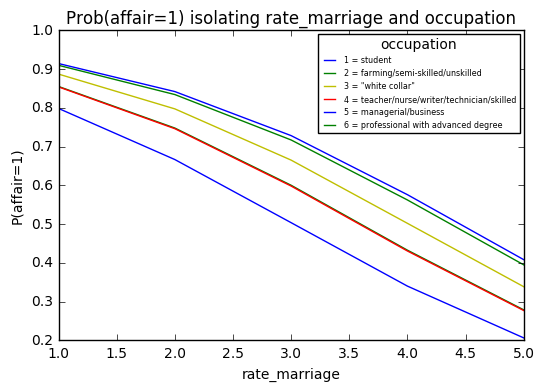

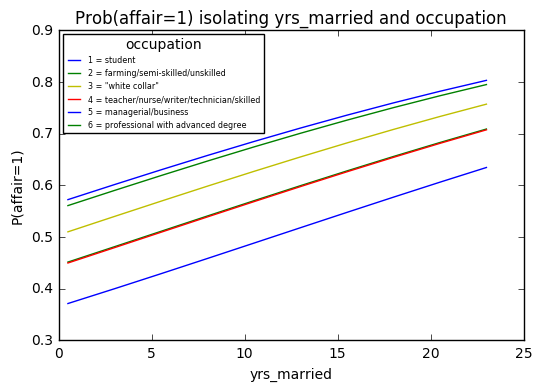

In [202]:
def isolate_and_plot(variable):
    # isolate gre and class rank
    grouped = pd.pivot_table(combos, values=['affair_pred'], index=[variable, 'occupation'],
                  aggfunc=np.mean)
    # make a plot
    colors = 'rbgyrbgy'
    for col in combos.occupation.unique():
        plt_data = grouped.ix[grouped.index.get_level_values(1)==col]
        pl.plot(plt_data.index.get_level_values(0), plt_data['affair_pred'], color=colors[int(col)])
        
    pl.xlabel(variable)
    pl.ylabel("P(affair=1)")
    pl.legend(['1 = student', '2 = farming/semi-skilled/unskilled', 
'3 = "white collar"', '4 = teacher/nurse/writer/technician/skilled', 
'5 = managerial/business', '6 = professional with advanced degree'
], loc='best', title='occupation',fontsize = 'xx-small')
    pl.title("Prob(affair=1) isolating " + variable + " and occupation")
    pl.show()

isolate_and_plot('rate_marriage')
isolate_and_plot('yrs_married')


In [264]:
pl.plot?

In [266]:
colors = 